# Retirement Planner

---

## Environment Setup

In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
import os
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
%matplotlib inline

In [4]:
# Set the random seed for resutls reproducibility (for testing purposes only)

---

## Portfolio Planner

In this activity, you will use the Alpaca API to grab historical data for a `60/40` portfolio using `SPY` to represent the stock portion and `AGG` to represent the bonds.

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

# Data Collection

In this step, you will need to use the Alpaca api to fetch closing prices for the `SPY` and `AGG` tickers. Save the results as a pandas DataFrame

In [3]:
# Subset your tickers, then pull returns data:
# Set the ticker
ticker = ["SPY", "AGG"]

# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes of 1 year, between now and 365 days ago.
start_date = pd.Timestamp('2019-01-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2019-12-31', tz='America/New_York').isoformat()

# Get 1 year's worth of historical data for SPY and AGG
df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=start_date,
    end=end_date,
    after=None,
    until=None,
).df

# Drop unnecessary columns
df = df.drop(
    columns=['open', 'high', 'low', 'volume'],
    level=1
)

In [4]:
# Display sample data
df.head()

,AGG,SPY
,close,close
2019-01-02 00:00:00-05:00,106.585,249.89
2019-01-03 00:00:00-05:00,107.020,244.46
2019-01-04 00:00:00-05:00,106.695,252.41
2019-01-07 00:00:00-05:00,106.470,254.40
2019-01-08 00:00:00-05:00,106.420,256.65


---

## Monte Carlo Simulation

In this step, you will run Monte Carlo Simulations for your portfolio to model portfolio performance at different retirement ages. 

Complete the following steps:

1. Calculate the daily returns for the SPY and AGG closing prices.

2. Calculate volatility for both the SPY and AGG closing prices.

3. Find the last day's closing price for both stocks and save those as variables

4. Run a Monte Carlo Simulation of at least `100` iterations and generate at least `30` years of closing prices

**Hint:** There are `252` trading days per year, so the number of records to generate for each Monte Carlo run will be `252 days * 30 years`.

In [35]:
# Calculate the daily roi for the stocks
daily_returns = df.pct_change()
daily_returns

,AGG,SPY
,close,close
2019-01-02 00:00:00-05:00,NaN,NaN
2019-01-03 00:00:00-05:00,0.004081,-0.021730
2019-01-04 00:00:00-05:00,-0.003037,0.032521
2019-01-07 00:00:00-05:00,-0.002109,0.007884
2019-01-08 00:00:00-05:00,-0.000470,0.008844
...,...,...
2019-12-24 00:00:00-05:00,0.001292,0.000125
2019-12-26 00:00:00-05:00,0.000934,0.005136
2019-12-27 00:00:00-05:00,0.001245,-0.000155


In [36]:
# Compute daily volatility
volatility = daily_returns.std()
# Compute volatility for each asset  ( SPY and AGG)
spy_volatility =volatility['SPY']['close']
agg_volatility =volatility['AGG']['close']



In [37]:
# Save the last day's closing price
spy_close = df['SPY']['close'][-1]
agg_close = df['AGG']['close'][-1]

In [38]:
# Setup the Monte Carlo Parameters
number_simulations = 100
number_records = 252 * 30
monte_carlo = pd.DataFrame()

In [39]:
# Run the Monte Carlo Simulation
for n in range(number_simulations):
    print(f"Simulation {n} ")
    
    # This creates the intial price from which the price willbe calculated from.
    spy_prices = [spy_close]
    agg_prices = [agg_close]
    
    for x in range(number_records):
        spy_prices.append(spy_prices[-1] * (1 + np.random.normal(daily_returns.mean()["SPY"]["close"], spy_volatility)))
        agg_prices.append(agg_prices[-1] * (1 + np.random.normal(daily_returns.mean()["AGG"]["close"], agg_volatility)))

    combined_portfolio = pd.DataFrame({'SPY simulated price': spy_prices,"AGG simulated price": agg_prices})
    
    # Calculate the portfolio of daily returns 
    portfolio_returns = combined_portfolio.pct_change()
    
    # Set the portfolio Weights 
    stock_weight = .60
    bond_weight = .40
    
    # Calculate the weighted portfolio return: 
    portfolio_returns = stock_weight * portfolio_returns["SPY simulated price"] + bond_weight * portfolio_returns["AGG simulated price"]
    
    # Calculate the normalized, cumulative return series
    monte_carlo[n] = (1 + portfolio_returns.fillna(0)).cumprod()

Simulation 0 
Simulation 1 
Simulation 2 
Simulation 3 
Simulation 4 
Simulation 5 
Simulation 6 
Simulation 7 
Simulation 8 
Simulation 9 
Simulation 10 
Simulation 11 
Simulation 12 
Simulation 13 
Simulation 14 
Simulation 15 
Simulation 16 
Simulation 17 
Simulation 18 
Simulation 19 
Simulation 20 
Simulation 21 
Simulation 22 
Simulation 23 
Simulation 24 
Simulation 25 
Simulation 26 
Simulation 27 
Simulation 28 
Simulation 29 
Simulation 30 
Simulation 31 
Simulation 32 
Simulation 33 
Simulation 34 
Simulation 35 
Simulation 36 
Simulation 37 
Simulation 38 
Simulation 39 
Simulation 40 
Simulation 41 
Simulation 42 
Simulation 43 
Simulation 44 
Simulation 45 
Simulation 46 
Simulation 47 
Simulation 48 
Simulation 49 
Simulation 50 
Simulation 51 
Simulation 52 
Simulation 53 
Simulation 54 
Simulation 55 
Simulation 56 
Simulation 57 
Simulation 58 
Simulation 59 
Simulation 60 
Simulation 61 
Simulation 62 
Simulation 63 
Simulation 64 
Simulation 65 
Simulation 66 
Simul

In [40]:
# Check that the simulation ran successfully
monte_carlo.head()


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009441,1.002785,0.998885,1.008020,0.994790,1.005616,0.997494,1.000351,1.005299,1.005823,...,1.001217,0.997170,1.004405,1.004835,1.000296,1.006518,1.003902,0.995114,1.002784,1.001421
2,1.013226,0.995923,0.995480,1.012848,1.000485,1.011125,0.989178,1.006095,1.010969,1.002740,...,1.004325,1.005251,1.002748,1.006593,1.001779,1.004831,1.005541,0.992697,1.007633,1.000979
3,1.010057,0.994852,0.995549,1.013712,1.003269,1.012449,0.989616,1.003364,1.012621,1.005792,...,1.009554,1.011201,0.999195,1.012516,0.997349,1.006224,1.010004,0.995812,1.003522,1.001810
4,1.008602,0.995415,0.998180,1.014462,1.006479,1.011359,0.996385,1.003970,1.010139,1.002880,...,1.012725,1.010947,1.004895,1.010116,0.992214,1.005925,1.008450,0.993870,1.015379,1.004774


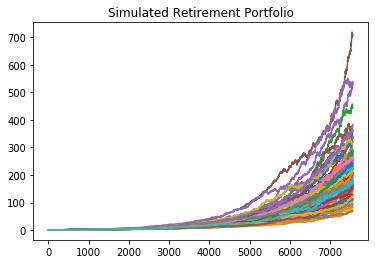

In [41]:
# Visualize the Simulation
monte_carlo.plot(
    legend=None,
    title="Simulated Retirement Portfolio"
)


In [42]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_returns = monte_carlo.iloc[-1, :]

In [43]:
# Select the last row for the cumulative returns (cumulative returns at 20 years)
ending_returns = monte_carlo.tail(1).T
ending_returns.head()

,7560
0,276.550125
1,200.516789
2,271.238511
3,221.373839
4,240.745971


In [44]:
# Display the 90% confidence interval for the ending returns
confidence_interval = ending_returns.quantile(q=[0.05, 0.95], numeric_only=True)
confidence_interval

,7560
0.05,95.857555
0.95,382.612105


<Figure size 432x288 with 0 Axes>

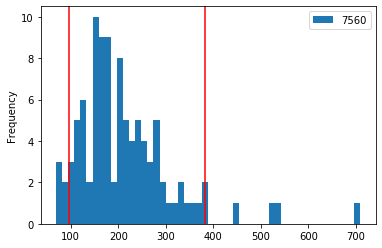

In [45]:
# Visualize the distribution of the ending returns
plt.figure();
ending_returns.plot.hist(bins=50)
plt.axvline(confidence_interval.iloc[0, 0], color="r")
plt.axvline(confidence_interval.iloc[1, 0], color="r")

---

## Retirement Analysis

In this section, you will use the monte carlo model to answer the following retirement planning questions:

1. What are the expected cumulative returns at `30` years for the `10th`, `50th`, and `90th` percentiles?

2. Given an initial investment of `$20,000`, what is the expected return in dollars at the `10th`, `50th`, and `90th` percentiles?

3. Given the current projected annual income from the Plaid analysis, will a `4%` withdrawal rate meet or exceed that value at the `10th` percentile? Note: This is basically determining if retirement income is equivalent to current income.

4. How would a `50%` increase in the initial investment amount affect the `4%` retirement withdrawal? In other words, what happens if the initial investment had been bigger?

### What are the expected cumulative returns at 30 years for the 10th, 50th, and 90th percentiles?

In [49]:
# Compute cumulative returns
 
ending_returns.quantile([.1, .5, .9])

,7560
0.1,111.120462
0.5,190.320233
0.9,332.248498


### Given an initial investment of `$20,000`, what is the expected portfolio return in dollars at the 10th, 50th, and 90th percentiles?

In [51]:
# Set initial investment
initial_investment = 20000
# Compute expected portfolio return
initial_investment * ending_returns.quantile([.1, .5, .9])

,7560
0.1,2.222409e+06
0.5,3.806405e+06
0.9,6.644970e+06


### Given the current projected annual income from the Plaid analysis, will a 4% withdraw rate from the retirement portfolio meet or exceed that value at the 10th percentile?

Note: This is effectively saying that 90% of the expected returns will be greater than the return at the 10th percentile, so this can help measure the uncertainty about having enough funds at retirement

In [53]:
# Set Plaid's projected income. From the prior section.
projected_income= 7239 

# Calculate the 4% withdrawal for the ending return as retirement income

# Determine if the retirement income meets or exceeds the current projected income
retirement_income = .04 * (initial_investment * ending_returns.quantile(.1)).iloc[0]

# Determine if the retirement income meets or exceeds the current projected income
if retirement_income >= projected_income:
    print(f"You will have ${retirement_income:.2f} in retirement income which is sufficient")
else:
    print(f"You will have ${retirement_income:.2f} in retirement income which is not sufficient")


You will have $88896.37 in retirement income which is sufficient


### How would a 50% increase in the initial investment amount affect the 4% retirement withdrawal?

In [54]:
# Re-calculate the retirement income with a 50% increase in the initial investment amount
.04 * ( 30000 * ending_returns.quantile(.1)).iloc[0]

133344.55449326697

### Optional Challenge

Use the Monte Carlo data and calculate the cumulative returns at the `5%`, `50%`, and `95%` quartiles and plot this data as a line chart to see how the cumulative returns change over the life of the investment.

In this section, you need to calculate and plot the cumulative returns for the median and `90%` confidence intervals. This plot shows the expected cumulative returns for any given day between the first day and the last day of investment. 

In [21]:
# Compute projected returns

# Display sample data


In [22]:
# Plot the cumulative returns over time


In [23]:
# Compute portfolio performance over time

# Plot projected performance over time
